## AI-HDX prediction
The Colab ipynb allows users to execute the AI-HDX model online with your own protein sequence. This version accepts one protein sequence at a time. 
### Data pre-processing
Two inputs tables are required to run this program and please follow the [data pre-processing](https://github.com/joshuayuanlab151/Seq2HDX) to prepare your input tables. 

Two input tables.       


*   Embedding vector `protein.vector.txt`. Each row contains the embedding features of one amino acid in a protein. The amino acid position and protein length should be the same as what you use to create peptide fragments.
```
1       A       0.7358490566037735      -0.617314295    -1.089185948    -0.926272767    1.486725101     0.24679532899999998     7.09302729861882        10.0    9.28971707501478        9.337021486478037             10.0    7.365279704347391       10.0    10.0    10.0    10.0    10.0    10.0    10.0    8.783609968943882       10.0    7.280002015999065       8.450115895665682       10.0    10.0    10.0    5.964030583209426     7.146344167107368       8.065895013134284       6.170392186585261       6.279658184901517       10.0    10.0    7.604230019887311       6.271477663131956       5.0
2       S       0.823076923076923       0.026690504     0.97089611      -0.8436740090000001     0.9963095740000001      0.110544377     8.297702697724748       10.0    6.73267295119654        9.343798356658402     10.0    8.271411511314541       9.621667708642791       10.0    9.737630684887721       10.0    10.0    7.6932434097818 9.371150975102958       10.0    9.262866621926072       8.392960968875936             9.407270507272811       10.0    10.0    10.0    5.217362915633222       8.43036902195414        9.511538377416292       5.693010435855571       6.942363401080304       5.430183807243099       7.532460039491867     9.329241605105182       6.326262306609193       6.256265970868344
3       I       0.15384615384615385     -1.261786099    -0.592097155    1.012212402     0.45251484799999997     0.025312684     9.693799019988838       10.0    9.05979173309898        9.714463147834625             9.6272697565057 5.7077161189449175      9.870099956354897       8.809020315885116       9.855570413443004       9.518001877443082       10.0    9.003841305264624       9.35354070409281        8.997094134840536     10.0    9.645657796146146       9.162919586743056       9.743193166062767       10.0    10.0    5.021249872058216       9.751200904332315       9.764201398332677       6.05515425456685              6.409523482283048       5.589742145184536       7.146344167107368       9.311826787372903       6.238683139895791       6.248064744684293
```

*   List item `peptide fragments.csv`. Save the peptide fragments into a .csv file with start position, stop position, sequence like this:
```
8,21,DSASSPPYSVNQNL
8,21,DSASSPPYSVNQNL
34,45,YVDKLSSSGASW
34,45,YVDKLSSSGASW
46,60,HTEWTWSGGEGTVKS
46,68,HTEWTWSGGEGTVKSYSNSGVTF
```

Now we are ready to run AI-HDX!

### Download pre-trained models and confidence index score
Ten deep learning models trained by 10 different sets of training data which are randomly split 10 times from the same database. The 10 models will predict HDX rates independently and compute an average HDX rate and a standard deviation for each peptide fragment. A confidence index score which estimates the confidence of the prediction is assigned based on the average predicted HDX rate. 

In [ ]:
## Download the models from github repo
%%bash
wget https://github.com/Environmentalpublichealth/AI-HDX/raw/main/models.zip
unzip /content/models.zip

In [1]:
## Load the pre-trained Neural Network models
import tensorflow as tf
root_dir = '/home/lwang/AI-HDX-main/models'
model1 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m1")
model2 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m2")
model3 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m3")
model4 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m4")
model5 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m5")
model6 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m6")
model7 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m7")
model8 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m8")
model9 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m9")
model10 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m10")

model1.summary()

2024-09-10 15:20:18.250734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 15:20:22.185882: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-09-10 15:20:23.766016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_reversev2_grad_reversev2_reversev2_axis' with dtype int32 and shape [1]
	 [[{{node gradients_reversev2_grad_reversev2_reversev2_axis}}]]
2024-09-10 15:20:23.770620: I tensorf

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_11 (Reshape)        (None, 30, 36, 1)         0         
                                                                 
 masking_6 (Masking)         (None, 30, 36, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 36, 10)        260       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 36, 10)       40        
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 36, 20)        9820      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 34, 20)       0         
 2D)                                                  

2024-09-10 15:21:14.103061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-09-10 15:21:14.179913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 15:21:14.181887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 54,397
Trainable params: 54,377
Non-trainable params: 20
_________________________________________________________________


In [12]:
## Load the pre-trained confidence index score based on the error rate between predictions and ground true in validation sets
confidx = [0.435003467810392,0.584915875217703,0.691762575882027,0.707836210244849,0.626804716837474,0.591011203879881,0.532705643129479,0.426545116775042,0.251348832172361,0.36508649008649]

In [ ]:
# output the dssp files
import os
import sys
sys.path.append('/home/lwang/AI-HDX-main/ProteinComplex_HDX_prediction/BiLSTM+GAT_v2/pepGraph_generation/tool')
from output_dssp import output_dssp
import warnings
warnings.filterwarnings('ignore')

protein_name = '6DJL'

root_dir = '/home/lwang/models/HDX_LSTM/data/hdock'
pdb_dir = os.path.join(root_dir, 'structure', f'{protein_name}')
save_dir = os.path.join(root_dir, 'dssp_files', f'{protein_name}')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

fail_list = []
for file in os.listdir(pdb_dir):
    if file.endswith('.pdb'):
        pdb_name = file.split('.')[0]
        pdb_file = os.path.join(pdb_dir, file)
        try:
            chain_dssp = output_dssp(pdb_name, pdb_file, save_dir)
        except Exception as e:
            print(e)
            fail_list.append(file)
            continue
print(fail_list)

In [1]:
#python MSA_embedding.py <proteinID.hhm> <pdb.dssp.txt> <output txt file for embedding vector>
import os
root_dir = '/home/lwang/models/HDX_LSTM/data/hdock'
protein_name = '6DJL'

hhm_dir = f'{root_dir}/hhm_files'
dssp_dir = f'{root_dir}/dssp_files/{protein_name}'
save_dir = f'{root_dir}/embedding_files/{protein_name}_AIHDX'
python_script = '/home/lwang/AI-HDX-main/codes/MSA_embedding.py'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

fail_list = []
for dssp_file in os.listdir(dssp_dir):
    fname = dssp_file.split('.')[0]
    if dssp_file.startswith('MODEL'):
        if fname[-1] == 'A':
            hhm_fpath = os.path.join(hhm_dir, f'1OIX_A.hhm')
        elif fname[-1] == 'C':
            hhm_fpath = os.path.join(hhm_dir, f'6IXE_C.hhm')
        else:
            fail_list.append(fname)
            continue
    else:
        hhm_fpath = os.path.join(hhm_dir, f'{fname}.hhm')

    dssp_fpath = os.path.join(dssp_dir, dssp_file)
    save_fpath = os.path.join(save_dir, f'{fname}.embedding.txt')
    command = f'python {python_script} {hhm_fpath} {dssp_fpath} {save_fpath}'
    os.system(command)
print(fail_list)

[]


In [ ]:
import pandas as pd
import numpy as np
import torch

def parse_embedding(fpath):
    """
    Load the embedding from a file, return a dictionary of embedding for each residue
    Note: embedding_fpath is a list of embedding file paths for each chain, {structure_file}_{chain}.embedding.txt
    """
    embedding_dict = {}
    embedding = pd.read_table(fpath, header=None, sep=' ')
    embedding_seq = embedding.loc[:,1].to_numpy()
    embedding_index= embedding.loc[:,0].to_numpy()

    # sequence-based features
    HDMD = embedding.loc[:, 2:6].to_numpy().reshape(-1, 5)
    Res_charge = embedding.loc[:, 7].to_numpy().reshape(-1, 1)
    Res_polarity = embedding.loc[:, 8:11].to_numpy().reshape(-1, 4)
    ProteinLM = None

    #structure-based features
    SASA = embedding.loc[:, 12].to_numpy().reshape(-1, 1)
    rigidity = embedding.loc[:, 13].to_numpy().reshape(-1, 1)
    HSE = embedding.loc[:, 14:16].to_numpy()

    #MSA-based features
    HHblits = embedding.loc[:, 17:].to_numpy()

    #transform
    def rescale(data):
        data_max = np.max(data, axis=0)
        data_min = np.min(data, axis=0)
        rescale_data = (data - data_min[None, :]) / (data_max - data_min)[None, :]
        rescale_data = np.nan_to_num(rescale_data, nan=0.0)
        if feat_rescale:
            return rescale_data
        else:
            return data
    rescale_HSE = rescale(HSE)
    rescale_HHblits = rescale(HHblits)
    rescale_HDMD = rescale(HDMD)
    rescale_Res_charge = rescale(Res_charge)

    # order: SASA, rigidity, HSE, HHblits, HDMD, Res_charge, Res_polarity
    feature_array = np.concatenate((SASA, rigidity, rescale_HSE, rescale_HHblits, 
                                    rescale_HDMD, rescale_Res_charge, Res_polarity), axis=1)

    embedding_dict = {
        embedding.iloc[i, 0]: torch.tensor(feature_array[i, :], dtype = torch.float32) 
        for i in range(embedding.shape[0])}
    embedding_matrix = torch.tensor(feature_array, dtype=torch.float32)

    return embedding_dict, embedding_matrix, embedding_seq

def seq_embedding(keys, root_dir, mismatch_report = True, filter = []):
    """
    Generate the input array and truth array for the given HDX data file and embedding file
    filter: list of filters to apply to the data, e.g. contact, unique
    """
    database_id = keys[0].strip()
    apo_identifier = keys[4].strip().split('.')[0].upper()

    protein = keys[1]
    state = keys[2]
    chain_identifier = keys[5]
    correction = keys[6]
    protein_chains = keys[7]
    if isinstance(protein_chains, str):
        protein_chains = protein_chains.split(',')
    elif isinstance(protein_chains, list):
        protein_chains = [chains.split(',') for chains in protein_chains]

    complex_state = keys[8]
    feat_identifier = keys[9] #list or str

    print("processing",database_id, apo_identifier)
    hdx_fpath = os.path.join(root_dir, 'HDX_files', f'{database_id}_revised.xlsx')
    vector_dir = os.path.join(root_dir, 'embedding_files', feat_identifier)
    
    if not os.path.isfile(hdx_fpath):
        print("cannot find HDX table: ", hdx_fpath)
        return None 


    # read HDX data file
    datafile = pd.read_excel(hdx_fpath, sheet_name='Sheet1')
    datafile.columns = datafile.columns.str.lower()
    datafile = datafile[(datafile['state'].str.strip() == state) & (datafile['protein'].str.strip() == protein)]
    
    # filter peptides > 30 AA
    max_len = 30
    df = datafile[datafile['sequence'].str.len() < max_len] # sequence column
    df = df.sort_values(by=['start', 'end'], ascending=[True, True])

    if 'unique' in filter:
        df = df.drop_duplicates(subset=['start', 'end'], keep='last')
    elif 'AIHDX' in filter:
        df = df[(df['log_t']>3.4) & (df['log_t']<3.62)]
        if df.shape[0] == 0:
            print('No peptides found in the given range')
            return None

    start_pos = [x + correction_value for x in df['start'].astype(int).tolist()]
    end_pos = [x + correction_value for x in df['end'].astype(int).tolist()]
    seq = df['sequence'].tolist()
    log_t = df['log_t'].to_numpy()

    # read embedding file
    embed_dict, embed_array, embed_seq = load_embedding(vector_file, feat_rescale=False)
    embed_seq = [chemdata.three_to_one[res] for res in embed_seq]

    row_size = len(start_pos)
    nfactor = embed_array.shape[-1] + 3
    input_array = np.zeros((row_size,max_len,nfactor), dtype = np.float32)

    # filter out the sequences that do not match the embedding file
    pop_idx = []

    for i, (start, end, sequence) in enumerate(zip(start_pos, end_pos, seq)):
        embed_sequence = ''.join(embed_seq[start - 1:end])
        sequence = sequence.replace(' ','')
        if sequence != embed_sequence:
            pop_idx.append(i)
            if mismatch_report:
                print(f"Sequence mismatch at index {i}: {sequence} != {embed_sequence}")
            continue
        else:
            # augment the feat. mtx. with extra features then padding
            seq_array = embed_array[start - 1:end]
            rigidity_std = np.std(seq_array[:, 1].view(-1).numpy())
            seq_length = seq_array.shape[0] / max_len
            extra_vec = (log_t[i], rigidity_std, seq_length)
            extra_column = torch.Tensor(extra_vec).repeat(max_len, 1)

            padding_needed = max_len - seq_array.shape[0]
            padded_seq = F.pad(seq_array, (0, 0, 0, padding_needed), 'constant', 0)
            extended_padded_seq = torch.cat((padded_seq, extra_column), dim=1)            
            input_array[i,:,:] = extended_padded_seq

    start_pos = [x for i, x in enumerate(start_pos) if i not in pop_idx]
    end_pos = [x for i, x in enumerate(end_pos) if i not in pop_idx]
    log_t = [x for i, x in enumerate(log_t) if i not in pop_idx]

    #filter those failed sequences from the input ensembles
    non_empty_mask = ~(input_array == 0).all(axis=(1, 2))
    output_array = input_array[non_empty_mask, :, :] 

    truth = df["RFU"].to_numpy()
    truth = truth[non_empty_mask]
    return output_array, truth, start_pos, end_pos, log_t

In [2]:
import os
import sys
sys.path.append('/home/lwang/AI-HDX-main/ProteinComplex_HDX_prediction/BiLSTM+GAT_v2/pepGraph_generation')
import pandas as pd
import tensorflow as tf
from pepGraph_utlis import seq_embedding
class res(object):
    _registry = []
    def __init__(self, i, name, chain_id, position):
        self._registry.append(self)
        self.clusters = []
        self.energy = 0
        self.i = i
        self.name = name
        self.chain_id = chain_id
        self.position = position
    
    @classmethod
    def get_res(cls, res_index, chain_id):
        if not isinstance(res_index, int):
            res_index = int(res_index)
        for res in cls._registry:
            if res.i == res_index and res.chain_id == chain_id:
                return res
        return None

class pep(object):
    _registry = []
    #protein_embedding = {}
    def __init__(self, i, pep_sequence, chain, start_pos, end_pos, hdx_value):
        self._registry.append(self)
        self.i = i
        self.sequence = pep_sequence
        self.chain = chain
        self.start = start_pos
        self.end = end_pos
        self.clusters = []
        self.position = None
        self.node_embedding = None
        self.seq_embedding = None
        self.hdx_value = hdx_value
##################################### initial setting ##################################### 
root_dir = "/home/lwang/models/HDX_LSTM/data/hdock"
HDX_summary_file = f'{root_dir}/test_data_AF.xlsx'
hdx_df = pd.read_excel(HDX_summary_file, sheet_name='hdock_modeling')
hdx_df = hdx_df.dropna(subset=['structure_file'])

dssp_dir = os.path.join(root_dir, 'dssp_files')
hhm_dir = os.path.join(root_dir, 'hhm_files')
embedding_dir = os.path.join(root_dir, 'embedding_files')
HDX_dir = os.path.join(root_dir, 'HDX_files')
##################################### initial setting ##################################### 

### data preparation ###
usage = 'hdock' # 'train' or 'hdock'
graph_type = 'GVP' # 'GearNet' or 'GVP'
embedding_type = 'manual' # 'esm2' or 'manual'
radius_max = 8
radius_min = 3

# if usage == 'hdock'
protein_model = '6DJL'
df_filter = protein_model[:4]
N_model = 1000
res._registry = {}
pep._registry = {}

if usage == 'train':
    root_dir = '/home/lwang/models/HDX_LSTM/data/Latest_set'
    df = pd.read_excel(f'{root_dir}/merged_data-NAcomplex.xlsx', sheet_name='Sheet1')
    df = df.dropna(subset=['structure_file'])
    df = df[df['complex_state'] != 'ligand complex']
elif usage == 'hdock':
    df = pd.read_excel(f'{root_dir}/test_data_AF.xlsx', sheet_name='hdock_modeling')
    df = df.dropna(subset=['structure_file'])
    df = df[df['note'] == df_filter]

'''
HDX_dataframe, vector_file, protein, state,
    mismatch_report = True, correction_value = 0, filter = []'''

apo_identifier = list(df['structure_file'].astype(str).unique())
protein, state, chain_identifier = [], [], []
correction = []
match_uni = []
database_id = []
protein_chains=  []
complex_state = []
structure_list = []
feat_identifier = []
for i, temp_apo in enumerate(apo_identifier):
        if temp_apo.split(":")[0] != 'MODEL':
            temp_df = df[(df['structure_file'] == temp_apo)]
            temp_protein = temp_df['protein'].astype(str).to_list()
            temp_state = temp_df['state'].astype(str).to_list()
            temp_chain = temp_df['chain_identifier'].astype(str).to_list()
            temp_correction = temp_df['correction_value'].astype(int).to_list()
            temp_uni = temp_df['match_uni'].astype(str).to_list()
            temp_protein_chains= temp_df['protein_chain'].astype(str).to_list()
            temp_complex_state = temp_df['complex_state'].astype(str).to_list()

            structure_list.append(temp_apo)
            feat_identifier.append([temp_apo.upper()]*len(temp_protein_chains))
            protein.append(temp_protein)
            state.append(temp_state)
            chain_identifier.append(temp_chain)
            correction.append(temp_correction)
            match_uni.append(temp_uni)
            database_id.extend(temp_df['database_id'].astype(str).unique())
            protein_chains.append(temp_protein_chains)
            complex_state.append(temp_complex_state[0])
        else:
            model_list = [f'MODEL_{i}_REVISED' for i in range(1, N_model+1)]
            apo_models = temp_apo.split(":")[1:] # suppose the format is MODEL:apo1:apo2: ...
            temp_df = df[df['structure_file'].isin(apo_models)]

            temp_protein = [temp_df['protein'].astype(str).to_list()] * N_model
            temp_state = [temp_df['state'].astype(str).to_list()] * N_model
            temp_chain = [temp_df['chain_identifier'].astype(str).to_list()] * N_model
            temp_correction = [temp_df['correction_value'].astype(int).to_list()] * N_model
            temp_uni = [temp_df['match_uni'].astype(str).to_list()] * N_model
            temp_complex_state = ['protein complex'] * N_model
            temp_database_id = [temp_df['database_id'].astype(str).to_list()[0]] * N_model

            temp_protein_chains= [temp_df['protein_chain'].astype(str).to_list()] * N_model

            protein.extend(temp_protein)
            state.extend(temp_state)
            chain_identifier.extend(temp_chain)
            correction.extend(temp_correction)
            match_uni.extend(temp_uni)
            database_id.extend(temp_database_id)
            protein_chains.extend(temp_protein_chains)
            complex_state.extend(temp_complex_state)
            feat_identifier.extend([apo_models] * N_model)

            structure_list = structure_list + model_list

keys = [database_id, protein, state, match_uni, structure_list, chain_identifier, correction, protein_chains, complex_state, feat_identifier]
for id in range(len(keys[0])):
    key = [keys[i][id] for i in range(len(keys))]
    print(key)
    #return_value = seq_embedding(key, root_dir, mismatch_report = True, filter = ['AIHDX'])

    '''if return_value is None:
        raise ValueError('Error in seq_embedding function')
    else:
        pass'''

['PXD010586', ['Ras-related protein Rab-11A'], ['Rab11- Rab11a (Q70L) 1-216'], ['P62491'], '1OIX', ['A'], [0], ['A'], 'single', ['1OIX']]
['PXD010586', ['SH3 domain-binding protein 5'], ['SH3BP5- 31-455'], ['O60239'], '6IXE', ['C'], [0], ['C'], 'single', ['6IXE']]
['PXD010586', ['Ras-related protein Rab-11A', 'SH3 domain-binding protein 5'], ['Rab11: Rab11a (Q70L) 1-216+SH3BP5: 31-455', 'SH3BP5: 31-455+Rab'], ['P62491', 'O60239'], '6DJL', ['A', 'C'], [0, 0], ['A,C', 'A,C'], 'protein complex', ['6DJL', '6DJL']]
['PXD010586', ['Ras-related protein Rab-11A', 'SH3 domain-binding protein 5'], ['Rab11- Rab11a (Q70L) 1-216', 'SH3BP5- 31-455'], ['P62491', 'O60239'], 'MODEL_1_REVISED', ['A', 'C'], [0, 0], ['A', 'C'], 'protein complex', ['1OIX', '6IXE']]
['PXD010586', ['Ras-related protein Rab-11A', 'SH3 domain-binding protein 5'], ['Rab11- Rab11a (Q70L) 1-216', 'SH3BP5- 31-455'], ['P62491', 'O60239'], 'MODEL_2_REVISED', ['A', 'C'], [0, 0], ['A', 'C'], 'protein complex', ['1OIX', '6IXE']]
['PXD0

In [41]:
import numpy as np
import random

def random_sampling(input, truth, num_samples):
    random_items = random.sample(list(zip(input, truth)), num_samples)
    random_input, random_truth = zip(*random_items)
    random_input = tf.convert_to_tensor(random_input, dtype=tf.float32)
    random_truth = tf.convert_to_tensor(random_truth, dtype=tf.float32)
    return random_input, random_truth

random_input_apo, random_truth_apo = random_sampling(input_apo, truth_apo, 955)
random_input_complex, random_truth_complex = random_sampling(input_complex, truth_complex, 513)

input_data = tf.concat([random_input_apo, random_input_complex], axis=0)
truth_data = tf.concat([random_truth_apo, random_truth_complex], axis=0)

def extract_feature(input_data):
    SASA = input_data[:, :, 0:1]
    HHblits = input_data[:, :, 5:35]
    HDMD = input_data[:, :, 35:40]
    ori_input = np.concatenate((SASA, HDMD, HHblits), axis=2)
    ori_input = np.transpose(ori_input, (0, 2, 1))
    return ori_input

ori_input = extract_feature(input_data)
truth_data = truth_data
print('ori_input transpose shape:', ori_input.shape)

ori_input transpose shape: (1468, 36, 30)


### Run AI-HDX prediction
The script takes the 10 pre-trained models and predict 10 HDX rates for each peptide. An average HDX rate and a standard deviation of predicted HDX rate is computed and output into a new data frame. A confidence score to estimate the prediction confidence is calculated for each peptide and output to the data frame.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# get predictions from the 10 models randomly trained by different training sets and validation sets
x_test = tf.reshape(ori_input, (ori_input.shape[0], ori_input.shape[2], ori_input.shape[1], 1))
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
colnames = ["model1","model2","model3","model4", "model5","model6","model7","model8","model9", "model10"]
out_pred = []
for idx, model in enumerate(models):
  y_pred = model.predict(x_test)
  out_pred.append(y_pred)

out_df = np.concatenate(out_pred, axis=1)
print(out_df.shape)

46/46 [==============================] - 3s 59ms/step


46/46 [==============================] - 2s 48ms/step
(1468, 10)


PCC: 0.25546917970078414
RMSE: 0.18418297


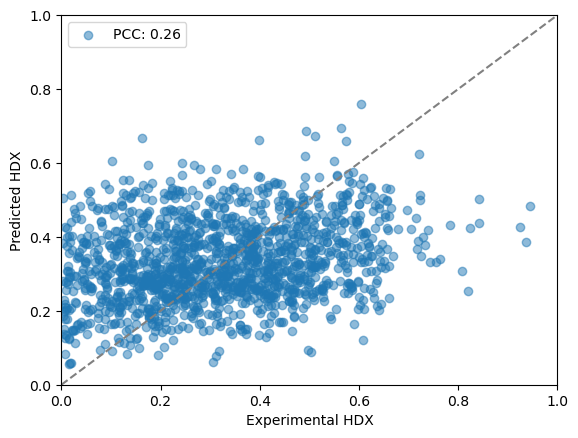

In [43]:
mean_pred = np.mean(out_df, axis=1)
rmse = np.sqrt(np.mean((mean_pred - truth_data)**2))
pcc = pearsonr(truth_data, mean_pred)
print('PCC:', pcc[0])
print('RMSE:', rmse)

### plot ###
plt.figure()
plt.scatter(truth_data, mean_pred, alpha=0.5)
plt.xlabel('Experimental HDX')
plt.ylabel('Predicted HDX')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], '--', color='gray')  # Add diagonal dashed line
plt.legend(['PCC: {:.2f}'.format(pcc[0])])
plt.show()

In [ ]:
# calculate average prediction values(mean) and standard deviation(SD)
out_df["average"] = out_df[colnames].mean(axis=1)
out_df["SD"] = out_df[colnames].std(axis=1)

# add CI score to each prediction
def pred_range(a):
  for i in range(0,10):
    if a >i*0.1 and a <= (i+1)*0.1:
      CI = confidx[i]
      return CI
scores=[]
for idx, pred in enumerate(out_df["average"]):
  conf_score = pred_range(pred)
  scores.append(conf_score)
  
out_df["CI"]=np.array(scores) 